In [1]:
from typing import List
import numpy as np
from matchms.typing import SpectrumType
from matchms.similarity.BaseSimilarity import BaseSimilarity
from matchms.similarity.spectrum_similarity_functions import (collect_peak_pairs,
                                            score_best_matches)


class Blink(BaseSimilarity):
    # Set key characteristics as class attributes
    is_commutative = True
    # Set output data type, e.g. ("score", "float") or [("score", "float"), ("matches", "int")]
    score_datatype = [("score", np.float64), ("matches", "int")]

    def __init__(self, 
        tolerance: float = 0.01, 
        bin_width: float = 0.01,
        mz_power: float = 0.0,
        intensity_power: float = 1.0):
        """
        Parameters
        ----------
        tolerance:
            Peaks will be considered a match when <= tolerance apart. Default is 0.1.
        mz_power:
            The power to raise m/z to in the cosine function. The default is 0, in which
            case the peak intensity products will not depend on the m/z ratios.
        intensity_power:
            The power to raise intensity to in the cosine function. The default is 1.
        """
        self.tolerance = tolerance
        self.bin_width = bin_width
        self.mz_power = mz_power
        self.intensity_power = intensity_power

    def matrix(self, references: List[SpectrumType], queries: List[SpectrumType]):

        mzi_v1 = discretized_spectra['s1']['mzi'].T
        mzc_v1 = discretized_spectra['s1']['mzc'].T

        mzi_v2 = discretized_spectra['s2']['mzi']
        mzc_v2 = discretized_spectra['s2']['mzc']
        
        mzi_scores = mzi_v1 @ mzi_v2
        mzc_counts = mzc_v1 @ mzc_v2
        pass

In [2]:
from matchms.importing import load_spectra

specs = tuple(load_spectra('tests/testdata/pesticides.mgf'))

In [34]:
from scipy.sparse import coo_matrix
from math import ceil
bin_width = 0.001
mzis_s1 = [
    spec.peaks.to_numpy.T
    for spec in specs
]
mzis_s2 = [
    spec.peaks.to_numpy.T
    for spec in specs
]

# mat = coo_matrix((disc_mz, (i, j)))
n_spec = len(mzis_s1)
n_bins = ceil(max([max(mz) for mz, ints in mzis_s1]) / bin_width)
# spec_bins
m1 = coo_matrix((n_spec, n_bins + 2), dtype=np.float32).todok()
# n_spec, spec_bins
# disc_mz = []
for i, (mz, ints) in enumerate(mzis_s1):
    disc_mz = 1 + (mz / bin_width).round().astype(np.int32)
    ints = ints / ints.sum()
    m1[i, disc_mz] = ints
    m1[i, disc_mz + 1] = ints 
    m1[i, disc_mz - 1] = ints 
m1 = m1.tocoo()

m2 = coo_matrix((n_spec, n_bins + 2), dtype=np.float32).todok()
for i, (mz, ints) in enumerate(mzis_s2):
    disc_mz = 1 + (mz / bin_width).round().astype(np.int32)
    ints = ints / ints.sum()
    m2[i, disc_mz] = ints
    m2[i, disc_mz + 1] = ints
    m2[i, disc_mz - 1] = ints
m2 = m2.tocoo()
# mat
#     disc_mz.append(

#     break
# # mz, ints = mzis_s1[0].T
# # mz, ints



# # data = np.arange(10)
# # i, j = np.arange(10), np.arange(10)
# # mat = coo_matrix((data, (i, j)), shape=(10,10))
# # mat.todense()
# disc_mz
# mz, ints

In [35]:
import matplotlib.pyplot as plt
scores = m1.dot(m2.T)

In [36]:
from matchms.similarity import CosineGreedy

ref = CosineGreedy(tolerance=bin_width).matrix(specs, specs)

In [37]:
bin_width

0.001

(array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.18111517e-05, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.18111517e-05, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 9.71423968e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.71423968e-01, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 matrix([[1.3154771e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8311149e-05,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.6496096e+00, 0.0000000e+00, ..., 0.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.000000

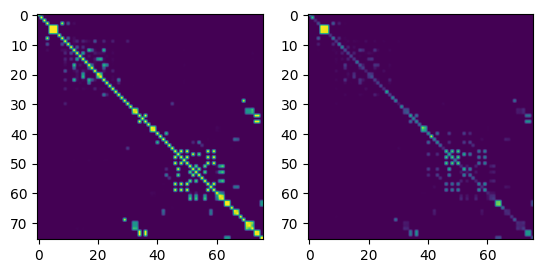

In [38]:
plt.subplot(121)
plt.imshow(ref['score'])
plt.subplot(122)
plt.imshow(scores.todense())

ref['score'], scores.todense()

In [13]:
scores.todense()

matrix([[4.3866310e-01, 0.0000000e+00, 0.0000000e+00, ..., 9.4370498e-06,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 5.4987001e-01, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0378064e-01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [9.4370498e-06, 0.0000000e+00, 0.0000000e+00, ..., 4.2676049e-01,
         4.1546312e-01, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1546312e-01,
         4.2864454e-01, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 1.7957962e-01]], dtype=float32)

In [9]:
m1.shape, m2.T.shape

((76, 975846), (975846, 76))

In [10]:
mzis_s1 = [
    spec.peaks.to_numpy
    for spec in specs
]
mzis_s2 = [
    spec.peaks.to_numpy
    for spec in specs
]
precursor_mzs_s1 = [
    spec.get('precursor_mz')
    for spec in specs
]
precursor_mzs_s2 = [
    spec.get('precursor_mz')
    for spec in specs
]
# precursor_mzs_s2,
# mzis_s1

In [11]:
bin_width = 0.01
tolerance = 0.01
intensity_power = 1.
# mz_power
trim_empty = False
remove_duplicates = False

def _bin_mzs(mzis, bin_width):
    """bins m/z values based on bin width"""
    mz_bins = np.rint(mzis[0]/bin_width).astype(int)
    return mz_bins

def _array_spec_ids(mzis):
    """arrays spectral ids such that each m/z bin is associate with an id"""
    spec_ids = np.concatenate([[i]*mzi.shape[1] for i,mzi in enumerate(mzis)]).astype(int)
    return spec_ids

def _calc_intensity_norm(mzis, intensity_power):
    """returns the intensity vector norm for each spectrum"""
    inorm = np.array([1.0/np.linalg.norm(mzi[1]**intensity_power) for mzi in mzis])
    return inorm

from dataclasses import dataclass
@dataclass
class NormSpec:
    spec_ids: np.ndarray
    mz_bins: np.ndarray
    normalized_intensities: np.ndarray
    counts: np.ndarray

def _normalize_spectra(mzis, bin_width, intensity_power) -> NormSpec:
    mzis = [mzi.T for mzi in mzis] # No filtering here
    # print()
    num_ions = [mzi.shape[1] for mzi in mzis]
    spec_ids = _array_spec_ids(mzis)
    inorm = _calc_intensity_norm(mzis, intensity_power)
    cnorm = np.ones(len(mzis))
    # print(len(num_ions), num_ions)
    # print(len(spec_ids), spec_ids)
    mzis = np.concatenate(mzis, axis=1)
    mzis[1] = mzis[1]**intensity_power
    normalized_intensities = inorm[spec_ids] * mzis[1]
    counts = cnorm[spec_ids].astype(int)
    mz_bins = _bin_mzs(mzis, bin_width)
    # print(len(mz_bins), mz_bins)
    return NormSpec(
        spec_ids=spec_ids,
        mz_bins=mz_bins,
        normalized_intensities=normalized_intensities,
        counts=counts,
    )


def _network_kernel(d_spec, tolerance, bin_width):
    """
    expand bins to have tolerance
    """
    bin_num = int(2*(tolerance/bin_width)-1)
    tol_matrix = np.arange(-bin_num//2+1, bin_num//2+1).flatten()
    
    d_spec['normalized_intensities'] = np.add.outer(d_spec['normalized_intensities'], np.zeros_like(tol_matrix)).flatten()
    d_spec['counts'] = np.add.outer(d_spec['counts'], np.zeros_like(tol_matrix)).flatten()
    d_spec['spec_ids'] = np.add.outer(d_spec['spec_ids'], np.zeros_like(tol_matrix)).flatten()
    d_spec['mz_bins'] = np.add.outer(d_spec['mz_bins'], tol_matrix).flatten()
    
def _build_matrices(n_mzis_s1, n_mzis_s2, tolerance, bin_width, mass_diffs):
    
    _network_kernel(n_mzis_s1, tolerance, bin_width) 

    _shift_bins(n_mzis_s1, n_mzis_s2)
    max_mz = _calc_max_mz(n_mzis_s1, n_mzis_s2, mass_diffs, bin_width)
    
    s1_mz_m_i, s1_mz_m_c = _construct_sparse_matrices(n_mzis_s1, 'mz_bins', max_mz)
    s2_mz_m_i, s2_mz_m_c = _construct_sparse_matrices(n_mzis_s2, 'mz_bins', max_mz)
    
    sparse_matrices = {'s1':{'mzi':s1_mz_m_i, 'mzc':s1_mz_m_c, 'metadata':n_mzis_s1['metadata']},
                              's2':{'mzi':s2_mz_m_i, 'mzc':s2_mz_m_c, 'metadata':n_mzis_s2['metadata']}}
    
    return sparse_matrices

n_mzis_s1 = _normalize_spectra(mzis_s1, bin_width, intensity_power, )
n_mzis_s2 = _normalize_spectra(mzis_s2, bin_width, intensity_power, )
discretized_spectra = _build_matrices(n_mzis_s1, n_mzis_s2, tolerance, bin_width, mass_diffs)

# discretized_spectra = _build_matrices(n_mzis_s1, n_mzis_s2, tolerance, bin_width, mass_diffs)

NameError: name 'mass_diffs' is not defined

In [ ]:
# discretized_spectra = blink.discretize_spectra(mzml.spectrum.tolist(), mgf.spectrum.tolist(), mzml.precursor_mz.tolist(),  mgf.precursor_mz.tolist(),
#                                          bin_width=0.001, tolerance=0.01, intensity_power=0.5, trim_empty=False, remove_duplicates=False, network_score=False)
